In [1]:
import numpy as np
import control
from IPython.display import display, Markdown, Latex
import sys
from control_utils import * #biblioteca de funções que eu mesmo desenvolvi

# Questão 1

In [2]:
control.tf([1], [1, 5]) + control.tf([5], [1])

TransferFunction(array([ 5, 26]), array([1, 5]))

In [3]:
Fs = control.tf([5], [1, 4])
Gs = control.tf([1], [1, 2])
Hs = control.tf([1], [1, 5]) + control.tf([5], [1])
GHs = Gs*Hs

T = 0.2
Fz = control.c2d(Fs, Ts=T, method='zoh')
Gz = control.c2d(Gs, Ts=T, method='zoh')
GHz = control.c2d(GHs, Ts=T, method='zoh')

FTMFz = Gz/(1 + GHz)
FTMFz_all = Fz*FTMFz
FTMFz_all = FTMFz_all.minreal()
FTMFz_all

TransferFunction(array([ 0.11346575, -0.04174172]), array([ 1.        , -0.65052328,  0.04182766,  0.02182605]), 0.2)

{'Mp': 1.598721155460228e-14,
 'tp': 9.4,
 'ts5': 0.8,
 'ts2': 1.0,
 'tr': 0.4,
 'td': 0.4,
 'ess': 0.8263888888888892,
 'final_value_step_simulated': 0.17361111111111086,
 'final_value_step_theoretical': 0.17361111111111072}

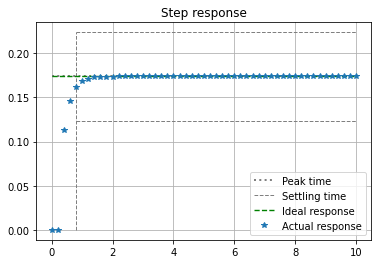

In [4]:
k_max = 50
tfinal = k_max*T

step_info(FTMFz_all, tfinal=tfinal)

/usr/local/lib/python3.8/dist-packages/control/timeresp.py:917: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


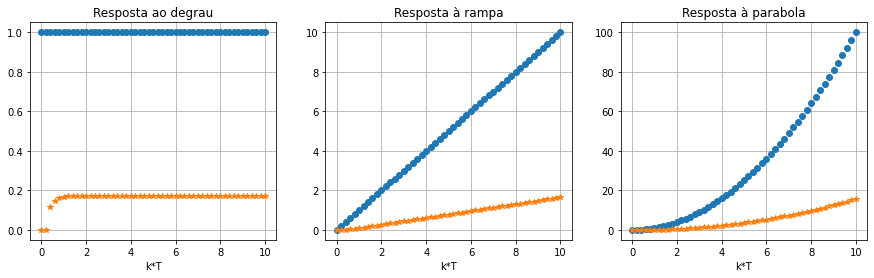

In [5]:
plot_responses(FTMFz_all, tfinal=50*T)

In [6]:
display(Markdown('### Funções no domínio z'))
display(Latex('$G(z)$ = ' + Gz._repr_latex_()))
show_formatted(tf_reqeq_format(Gz, input_function='e', output_function='c'))
display(Markdown('-------------'))
display(Latex('$GH(z)$ = ' + GHz._repr_latex_()))
show_formatted(tf_reqeq_format(GHz, input_function='e', output_function='v'))
display(Markdown('-------------'))
display(Latex('$F(z)$ = ' + Fz._repr_latex_()))
show_formatted(tf_reqeq_format(Fz, input_function='r', output_function='x'))

### Funções no domínio z

<IPython.core.display.Latex object>

$$c_{[n]} = +0.1648 e_{[n-1]} +0.6703c_{[n-1]}$$

-------------

<IPython.core.display.Latex object>

$$v_{[n]} = +0.837 e_{[n-1]} -0.2952 e_{[n-2]} +1.038v_{[n-1]} -0.2466v_{[n-2]}$$

-------------

<IPython.core.display.Latex object>

$$x_{[n]} = +0.6883 r_{[n-1]} +0.4493x_{[n-1]}$$

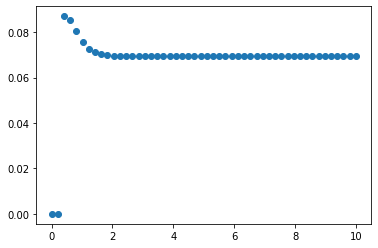

In [7]:
t = np.linspace(0, tfinal, k_max)

r = t # rampa
r = np.ones(k_max) # step
x = np.empty(k_max) # após f
e = np.empty(k_max) # após somador 
c = np.empty(k_max) # após G
v = np.empty(k_max) # após GH

# Unroll first iterations to get initial conditions
n=0
x[n] = 0 # F(z)
c[n] = 0 # G(z)
v[n] = 0 # GH(z)
e[n] = x[n] - v[n] 

n=1
x[n] = +0.6883*r[n-1] +0.4493*x[n-1] # F(z)
c[n] = +0.1264*e[n-1] +0.3679*c[n-1] # G(z)
v[n] = +0.837*e[n-1]  -0.2952*0 +1.038*v[n-1] -0.2466*0 # GH(z)
e[n] = x[n] - v[n] 
    
# Simulate system
for n in range(2, k_max):
    x[n] = +0.6883*r[n-1] +0.4493*x[n-1] # F(z)
    c[n] = +0.1264*e[n-1] +0.3679*c[n-1] # G(z)
    v[n] = +0.837*e[n-1]  -0.2952*e[n-2] +1.038*v[n-1] -0.2466*v[n-2] # GH(z)
    e[n] = x[n] - v[n] 
    #print(c[n])
plt.scatter(t, c) # Essa resposta está claramente errada

{'Mp': 1.598721155460228e-14,
 'tp': 9.4,
 'ts5': 0.8,
 'ts2': 1.0,
 'tr': 0.4,
 'td': 0.4,
 'ess': 0.8263888888888892,
 'final_value_step_simulated': 0.17361111111111086,
 'final_value_step_theoretical': 0.17361111111111072}

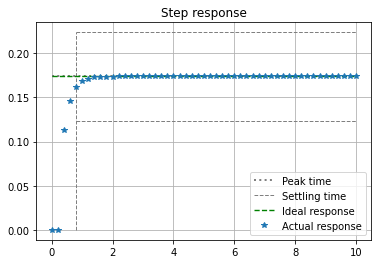

In [8]:
step_info(FTMFz_all, 10)

# Questão 2

In [9]:
control.tf([0.1813], [1, -0.8187], T)

TransferFunction(array([0.1813]), array([ 1.    , -0.8187]), 0.2)

In [10]:
T = 0.2
tfinal = 10
Cz = control.tf([0.1813], [1, -0.8187], T)
show_formatted(tf_reqeq_format(Cz, input_function='e', output_function='u'))

$$u_{[n]} = +0.1813 e_{[n-1]} +0.8187u_{[n-1]}$$

{'Mp': 0.0,
 'tp': 10.0,
 'ts5': 2.4000000000000004,
 'ts2': 3.2,
 'tr': 1.8,
 'td': 1.0,
 'ess': 0.8333336537824346,
 'final_value_step_simulated': 0.1666663462175654,
 'final_value_step_theoretical': 0.16666666666666546}

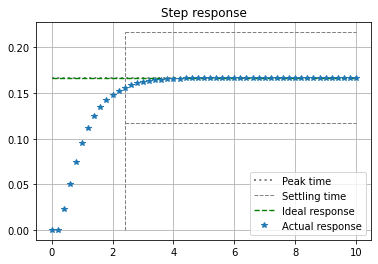

In [11]:
# Como podemos ver, a equação acima é a correta
Gs = control.tf([1], [1, 5])
Gz = control.c2d(Gs, T, method='zoh')
FTMF = Cz*Gz/(1 + Cz*Gz*1)
FTMF = FTMF.minreal()
step_info(FTMF, tfinal)

In [12]:
step = control.tf([1, 0], [1, -1], FTMF.dt)
(FTMF*step).minreal()

TransferFunction(array([0.02292069, 0.        ]), array([ 1.        , -2.18657944,  1.51068303, -0.32410359]), 0.2)

In [13]:
# Symbolical partial fraction expantion
show_formatted(tf_expand_partial_format((FTMF*step).minreal()))

$$Y(Z)/Z = \frac{0.1196*Z}{Z - 0.4263} + \frac{-0.2863*Z}{Z - 0.7603} + \frac{0.1667*Z}{Z - 1}$$

In [14]:
# Symbolical inverse laplace transform
show_formatted(tf_inverse_transform_format((FTMF*step).minreal()))

-0.0 * 0.0
0.11961553457136777 * 0.4262894133928825
-0.28628220123803594 * 0.7602900277785557
0.16666666666666816 * 0.9999999999999988


$$y(n) = +0.1196*0.4263^n -0.2863*0.7603^n +0.1667*1.0000^n$$

In [15]:
errors(FTMF)

0 states have been removed from the model
0 states have been removed from the model
System type: 0
Error analysis:
{
    "Kp": 0.16666666666666555,
    "ess_degrau": 0.8571428571428579,
    "ess_degrau_theorem": 0.8571428571428558,
    "Kv": 0,
    "ess_rampa": Infinity,
    "ess_rampa_theorem": Infinity,
    "Ka": 0,
    "ess_parabola": Infinity,
    "ess_parabola_theorem": -0.01939655172413793
}


/src/Exercícios Controle 2/Prova 1 2022/control_utils.py:157: RuntimeWarning: divide by zero encountered in true_divide
  metrics['ess_rampa'] = np.array(1)/K
/src/Exercícios Controle 2/Prova 1 2022/control_utils.py:171: RuntimeWarning: divide by zero encountered in true_divide
  metrics['ess_parabola'] = np.array(1)/K


{'Kp': 0.16666666666666555,
 'ess_degrau': 0.8571428571428579,
 'ess_degrau_theorem': 0.8571428571428558,
 'Kv': 0,
 'ess_rampa': inf,
 'ess_rampa_theorem': inf,
 'Ka': 0,
 'ess_parabola': inf,
 'ess_parabola_theorem': -0.01939655172413793}

In [16]:
FTMA = Cz*Gz*1
print('FTMF before gain = ', FTMF)
print('Poles =', FTMF.pole())
print('\n==============================\n')
z1 = 0.5933 + 0.2944j
K = gain_for_pole(FTMA=FTMA, z1=z1)
print('K =', K)

FTMF_new = (K*Cz*Gz/(1 + K*Cz*Gz*1)).minreal()
print('\nFTMF before gain = ', FTMF_new)
print('Poles =', FTMF_new.pole())

FTMF before gain =  
       0.02292
----------------------
z^2 - 1.187 z + 0.3241

dt = 0.2

Poles = [0.76029003 0.42628941]


K = 5.998124197709129

FTMF before gain =  
        0.1375
----------------------
z^2 - 1.187 z + 0.4387

dt = 0.2

Poles = [0.59328972+0.2944j 0.59328972-0.2944j]


[0.59328972+0.2944j 0.59328972-0.2944j]


TransferFunction(array([0.13748115]), array([ 1.        , -1.18657944,  0.43866405]), 0.2)

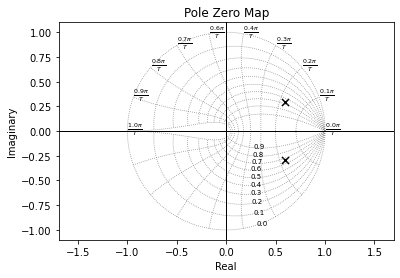

In [17]:
control.pzmap(FTMF_new, grid=True)
print(FTMF_new.pole())
FTMF_new